# Ecommerce Data EDA

### Purpose of the EDA
1. **_To find out the products which give us the best revenue_** *(so that the storage area can be optimized)*
2. **_To predict the amount of sold product_** *(so that the stocks can be maintained respectively and can ensure fast delivery)*

## Step 1: Importing the libraries and data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

## Step 2 : Exploring the data

##### 1. Looking at the data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


##### 2. Describing the data

In [4]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


##### 3. Check for the missing values in the dataset

In [5]:
df.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

#### Observations:

1. There are **negative** values in **Quantity** column. 
2. There are **negative** and **zero** values in **UnitPrice** column. 
3. There are **null** values in the **CustomerID** and **Description** column.

*We will handle each of the above mentioned observations in the next step.*

## Step 3: Cleaning the data

###### As part of cleaning the data, below steps are required to be taken:
1. The **InvoiceDate** column has dates in different formats and needs to be in a common format. 
2. Extract the **year**, **month** and **year_month** details from the **InvoiceDate** column and add as new columns.
3. Adding the **Revenue/Amount** column.
4. Handle the **negative** and **zero** values in **UnitPrice** column.
5. Handle the **negative** values in **Quantity** column.
6. Handle the null values in **CustomerId** and **Description** column.


##### 1. Format the InvoiceDate column for a unique date format.

In [6]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M')

##### 2. Adding the year, month and year_month column corresponding to the InvoiceDate column.

In [7]:
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['year_month'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

##### 3. Adding the Amount column

In [8]:
df['Amount']= df['UnitPrice']*df['Quantity']

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,year_month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26,2.55,17850.0,United Kingdom,12,2010,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26,3.39,17850.0,United Kingdom,12,2010,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26,2.75,17850.0,United Kingdom,12,2010,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26,3.39,17850.0,United Kingdom,12,2010,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26,3.39,17850.0,United Kingdom,12,2010,2010-12,20.34


##### 4. Negative and zero values in **UnitPrice** column

In [10]:
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,year_month,Amount
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51,-11062.06,NaN,United Kingdom,8,2011,2011-08,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52,-11062.06,NaN,United Kingdom,8,2011,2011-08,-11062.06


In [11]:
df[df.UnitPrice == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,year_month,Amount
622,536414,22139,NaN,56,2010-12-01 11:52,0.0,NaN,United Kingdom,12,2010,2010-12,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32,0.0,NaN,United Kingdom,12,2010,2010-12,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33,0.0,NaN,United Kingdom,12,2010,2010-12,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33,0.0,NaN,United Kingdom,12,2010,2010-12,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34,0.0,NaN,United Kingdom,12,2010,2010-12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33,0.0,NaN,United Kingdom,12,2011,2011-12,0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58,0.0,NaN,United Kingdom,12,2011,2011-12,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58,0.0,NaN,United Kingdom,12,2011,2011-12,0.0
538554,581408,85175,NaN,20,2011-12-08 14:06,0.0,NaN,United Kingdom,12,2011,2011-12,0.0


The **negative UnitPrice** values corresponds to the bad debt and it should be excluded because it will impact the **Revenue** 
calculation.

For the **zero UnitPrice** values, since it will not add up revenue but also not have any negative impact on revenue thus need not to be removed.

In [12]:
df = df[df.UnitPrice >=0]

##### 5. Negative Values in **Quantity** column

The negative values in **Quantity** column shows the **return/cancelled** orders.
Let's explore the data a bit more to understand the impact of the cancelled orders.

In [13]:
RevenueCancelledOrder= round(df['Amount'][df['Quantity']<0].sum(),2)
RevenueRetainedOrders= round(df['Amount'].sum(),2)
percentageOfCancelledRevenue = round(abs(RevenueCancelledOrder) / (RevenueRetainedOrders + abs(RevenueCancelledOrder))* 100, 2)

In [14]:
print(percentageOfCancelledRevenue, '%')

8.41 %


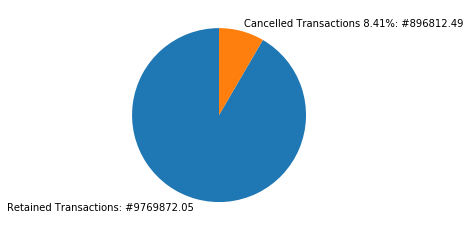

In [15]:
fig, ax = plt.subplots()
ax.pie(
    [RevenueRetainedOrders, abs(RevenueCancelledOrder)],
    labels=(
        f'Retained Transactions: #{RevenueRetainedOrders}',
        f'Cancelled Transactions {percentageOfCancelledRevenue}%: #{abs(RevenueCancelledOrder)}'
    ),
    startangle=90
)
plt.show()

If a product is sold in first go that defines its selling capacity. Further, the revenue contribution of cancelled orders is more than **8%** (a big contribution).

Therefore, the negative revenue produced by the cancelled orders needs to be removed.

In [16]:
df = df[df['Quantity']>=0]

In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID,month,year,Amount
count,531283.000000,531283.000000,397924.000000,531283.000000,531283.000000,531283.000000
mean,10.655299,3.898954,15294.315171,7.560242,2010.921543,20.077218
std,156.830617,35.876279,1713.169877,3.508723,0.268890,270.058254
min,1.000000,0.000000,12346.000000,1.000000,2010.000000,0.000000
25%,1.000000,1.250000,13969.000000,5.000000,2011.000000,3.750000
50%,3.000000,2.080000,15159.000000,8.000000,2011.000000,9.900000
75%,10.000000,4.130000,16795.000000,11.000000,2011.000000,17.700000
max,80995.000000,13541.330000,18287.000000,12.000000,2011.000000,168469.600000


##### 6. Null values in **CustomerID** and **Description** column.

Let's explore the data a bit more to observe the contribution of null-value data rows.

In [18]:
RevenueNullData = df['Amount'][df.CustomerID.isna()].sum()
TotalRevenue = df['Amount'].sum()
cleanDataRevenue = TotalRevenue - RevenueNullData

In [19]:
PercentageRevenueNulldata = round(RevenueNullData/TotalRevenue * 100, 2)
print(PercentageRevenueNulldata, "%")

16.46 %


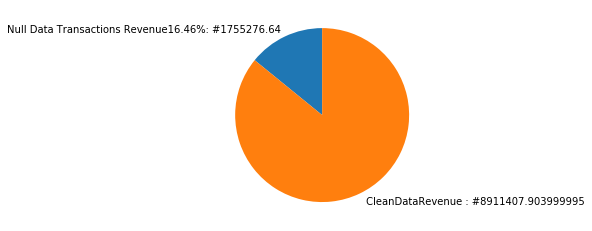

In [20]:
fig, ax = plt.subplots()
ax.pie(
    [RevenueNullData, TotalRevenue],
    labels=(
        f'Null Data Transactions Revenue{PercentageRevenueNulldata}%: #{RevenueNullData}',
        f' CleanDataRevenue : #{cleanDataRevenue}'
    ),
    startangle=90
)
plt.show()

The data that is missing is **customerID** and the **product description** but since the target questions for our EDA is to find the most selling products therefore the null values need not be removed and missing description is also not an issue as we have stock code present.

Revenue-wise, the null value data corresponds to **16%** of the total revenue therefore can't be ignored or removed and thus need to be included in our EDA.


## Step 4: Exploratory Data Analysis

#### Traget 1. To find the products which give us the best revenue.

In [21]:
ProductRevenue = df.groupby('StockCode')["Amount"].sum().sort_values(ascending = False)

df_revenue_product = pd.DataFrame(data = {
    'StockCode': ProductRevenue.index.values,
    'Revenue' : ProductRevenue.values
}) 

df_revenue_product.head()

,StockCode,Revenue
0,DOT,206248.77
1,22423,174484.74
2,23843,168469.60
3,85123A,104518.80
4,47566,99504.33


In the above table we can see that the most revenue-generating products sorted descending as per the revenue generated by these products.

Further, since the first item with stockCode **DOT (DOTCOM POSTAGE)** corresponds to the amount paid by the buyer for delivering the goods and thus the most revenue-generating product is with StockCode **22423**.

#### 2. To find the most commonly sold products to manage the inventory

We need to find out the most transacted products and the products sold in high quantity.

###### a. To find the most transacted Product.

In [22]:
# To find the most transacted Product

numberOfTransactions = df.StockCode.value_counts()
df_transactions = pd.DataFrame(data = {
    'StockCode': numberOfTransactions.index.values,
    'NumberOfTransactions': numberOfTransactions.values
})
df_transactions.head()

,StockCode,NumberOfTransactions
0,85123A,2270
1,85099B,2115
2,22423,2019
3,47566,1707
4,20725,1595


In the above table, we can see that the most transacted products and **85123A** is the most transacted product.

###### b. To find the most sold products(Quantity-wise)

In [23]:
ProductQuantitySold = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False)
df_quantity_sold = pd.DataFrame(data = {
    'StockCode': ProductQuantitySold.index.values,
    'QuantitySold': ProductQuantitySold.values
})
df_quantity_sold.head()

,StockCode,QuantitySold
0,23843,80995
1,23166,78033
2,22197,56921
3,84077,55047
4,85099B,48478


In the above table, we can see the most transacted products in descending order of quantities sold and **23843** is the most-sold product(quantity-wise).

Further, since the sales of a product does not remain constant all over the year therfore for better predictability and better inventory management, the data needs to be analyzed on the basis of monthly sales as well.

I have created a grouped dataframe **df_sold** which can be referred to analyze the monthly sales of a product year around. It will help the retailers to predict the sales of a product.

In [24]:
# below is the dataframe df_sold

df_sold = df.groupby(['StockCode', 'year_month'])['Quantity'].sum().to_frame(name = 'Quantity').reset_index()


df_sold.head()


,StockCode,year_month,Quantity
0,10002,2010-12,251
1,10002,2011-01,340
2,10002,2011-02,52
3,10002,2011-03,208
4,10002,2011-04,189


###### Let us check for the sales of the most revenue generating product 22423.

In [25]:
df_sold_22423 = df_sold[df_sold.StockCode == '22423']

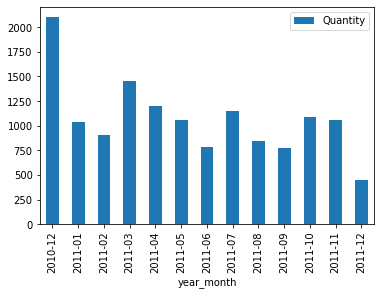

In [26]:
df_sold_22423.plot.bar(x = 'year_month', y = 'Quantity')

From, the above graph we have observed that the sales of **'22423'(REGENCY CAKESTAND 3 TIER)** was max in the month of decemeber, 2010. It might be because of Christmas days.

The sales fell drastically in Dec, 2011. It need to be analyzed further w.r.t. various other factors like some other competitive product took over or a similar reason.

Using this data, the retailer can maintain his inventory and can optimize the storage area with the most-revenue generating products.

# Thank You for your time to read my EDA.